In [10]:
import pandas as pd

# Chargement des données
file_path = "Recovery_status_Data.csv"  # Remplacez par le bon chemin si nécessaire
df = pd.read_csv(file_path, delimiter=";")

# Conversion de sessionDate en format datetime
df["sessionDate"] = pd.to_datetime(df["sessionDate"], format="%d/%m/%Y")

# Vérification des doublons
print("Nombre de doublons :", df.duplicated().sum())

# Remplacement des valeurs manquantes dans "value" par 0 (selon la description des données)
df["value"] = df["value"].fillna(0)

# Vérification après nettoyage
print(df.info())

# Affichage des premières lignes après nettoyage
print(df.head())


Nombre de doublons : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8073 entries, 0 to 8072
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sessionDate  8073 non-null   datetime64[ns]
 1   seasonName   8073 non-null   object        
 2   metric       8073 non-null   object        
 3   category     8073 non-null   object        
 4   value        8073 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 315.5+ KB
None
  sessionDate seasonName                                 metric  \
0  2023-07-02  2023/2024              bio_baseline_completeness   
1  2023-07-02  2023/2024                 bio_baseline_composite   
2  2023-07-02  2023/2024                  emboss_baseline_score   
3  2023-07-02  2023/2024  msk_joint_range_baseline_completeness   
4  2023-07-02  2023/2024     msk_joint_range_baseline_composite   

          category  value  
0              bio 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrage des catégories liées à la récupération
recovery_categories = ["bio", "msk_joint_range", "msk_load_tolerance", "subjective", "soreness", "sleep"]
df_recovery = df[df["category"].isin(recovery_categories)]

# Séparation des métriques "_completeness" et "_composite"
df_composite = df_recovery[df_recovery["metric"].str.endswith("_composite")]
df_completeness = df_recovery[df_recovery["metric"].str.endswith("_completeness")]

1️⃣ Évolution des scores composites au fil du temps

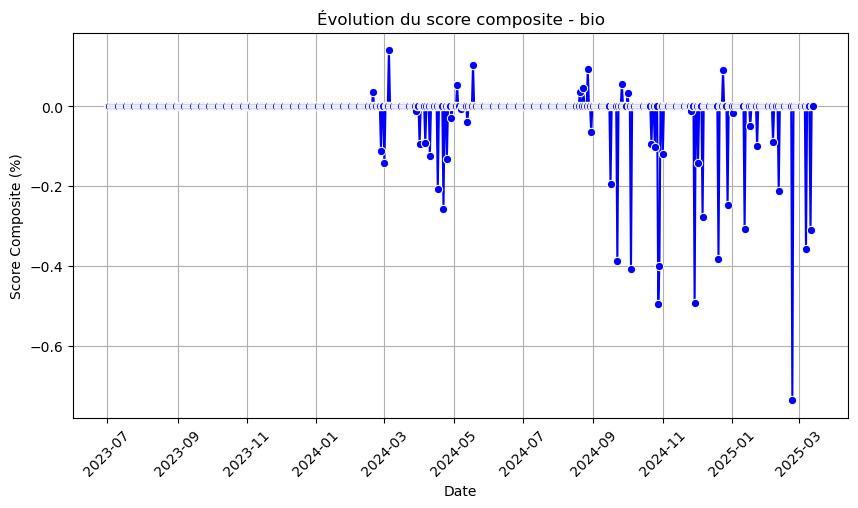

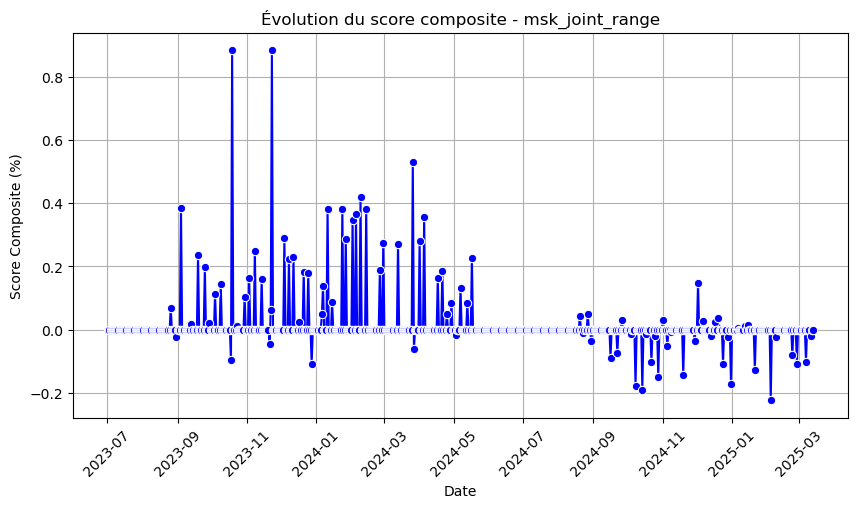

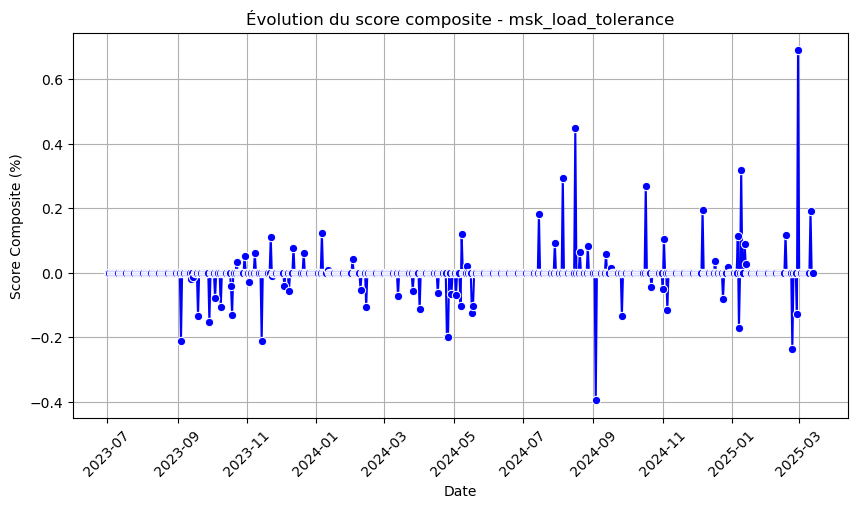

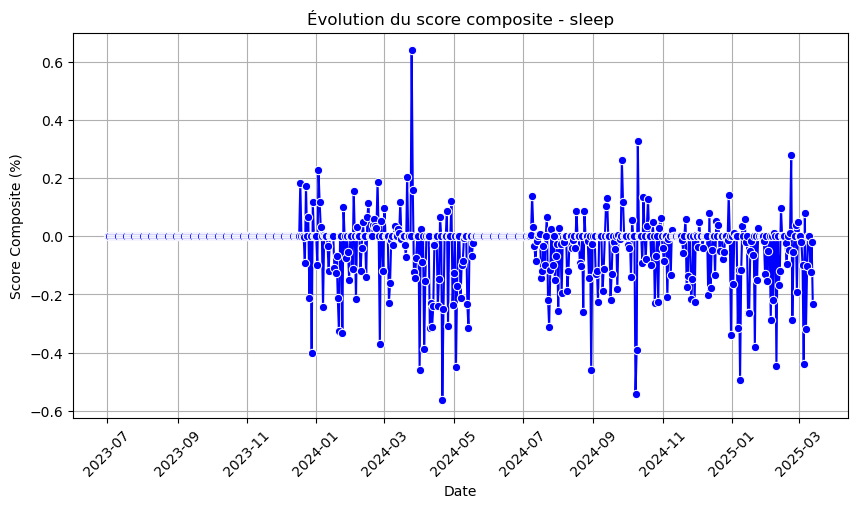

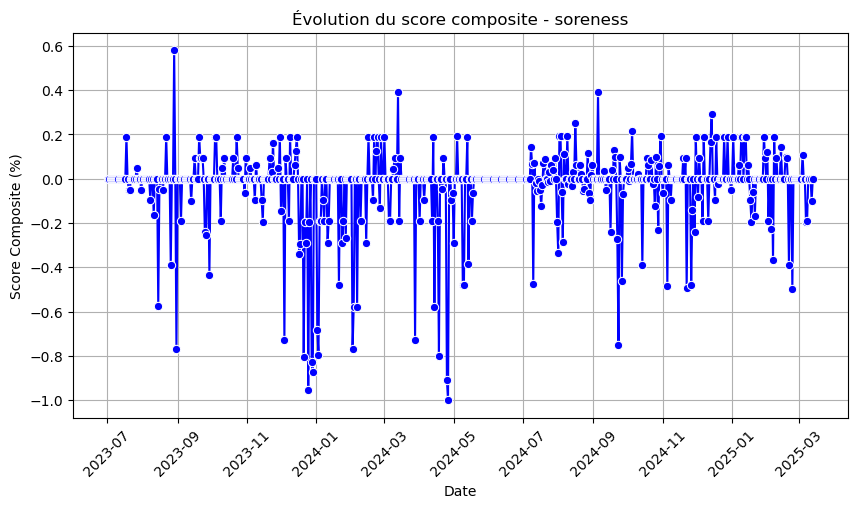

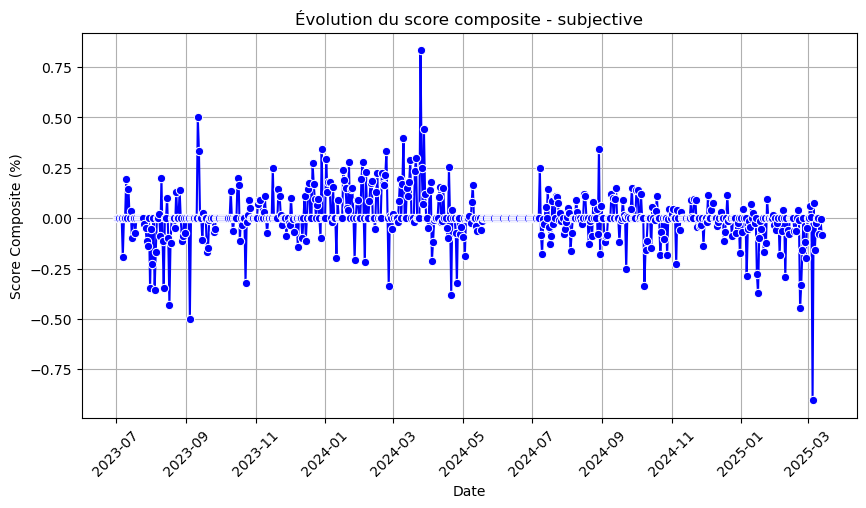

In [19]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(12, 6))
# sns.lineplot(data=df_composite, x="sessionDate", y="value", hue="category", marker="o")
# plt.title("Évolution des scores composites de récupération")
# plt.xlabel("Date")
# plt.ylabel("Score Composite (%)")
# plt.legend(title="Catégorie")
# plt.xticks(rotation=45)
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Liste des catégories uniques
categories = df_composite["category"].unique()

# Création d'un graphique pour chaque catégorie
for category in categories:
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df_composite[df_composite["category"] == category], 
                 x="sessionDate", y="value", marker="o", color="b")

    plt.title(f"Évolution du score composite - {category}")
    plt.xlabel("Date")
    plt.ylabel("Score Composite (%)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


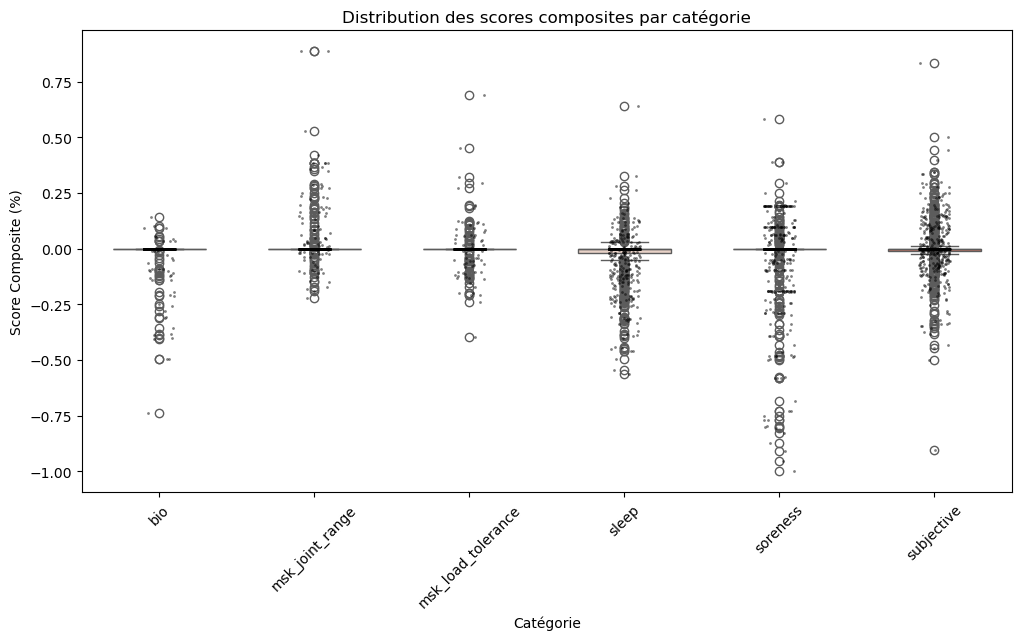

C:\Users\pc\AppData\Local\Temp\ipykernel_17816\1838772269.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_composite, x="category", y="value", palette="coolwarm", inner="quartile")


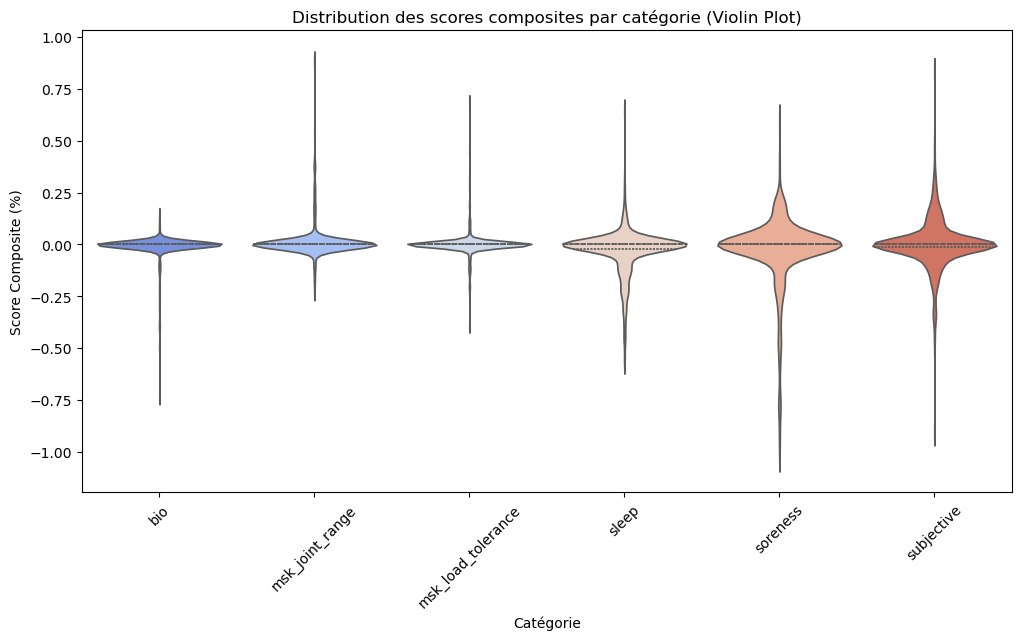

C:\Users\pc\AppData\Local\Temp\ipykernel_17816\1838772269.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_composite, x="category", y="value", palette="coolwarm", ci="sd")
C:\Users\pc\AppData\Local\Temp\ipykernel_17816\1838772269.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_composite, x="category", y="value", palette="coolwarm", ci="sd")


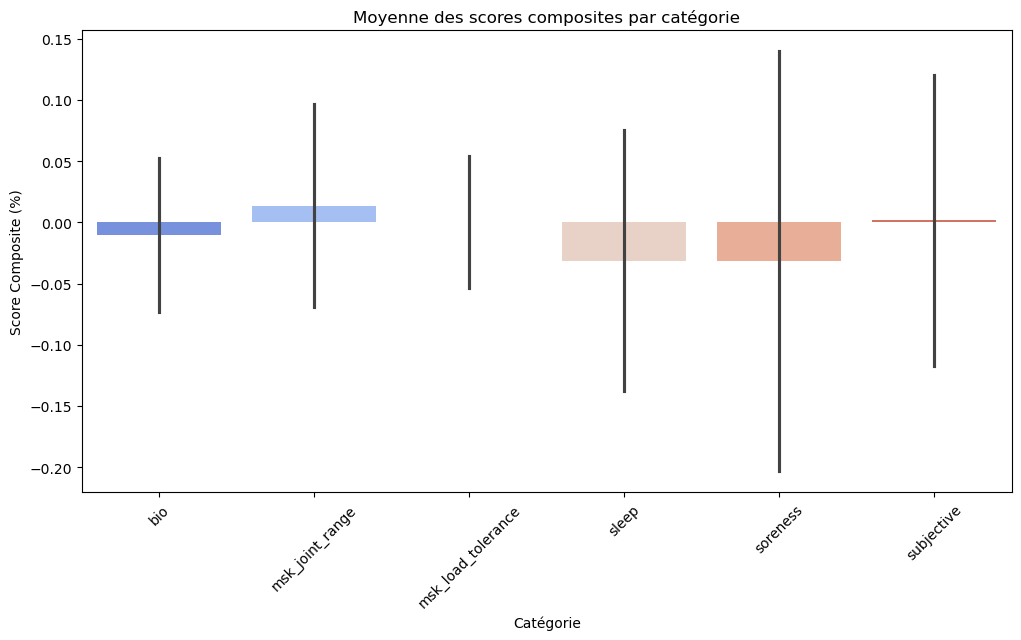

In [ ]:

plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(data=df_composite, x="category", y="value", palette="coolwarm", width=0.6, hue="category", legend=False)

# Scatter plot avec jitter pour éviter le chevauchement des points
sns.stripplot(data=df_composite, x="category", y="value", color="black", jitter=True, alpha=0.5, size=2)

plt.title("Distribution des scores composites par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Score Composite (%)")
plt.xticks(rotation=45)
plt.show()


#----------------------------------------------


plt.figure(figsize=(12, 6))
sns.violinplot(data=df_composite, x="category", y="value", palette="coolwarm", inner="quartile")
plt.title("Distribution des scores composites par catégorie (Violin Plot)")
plt.xlabel("Catégorie")
plt.ylabel("Score Composite (%)")
plt.xticks(rotation=45)
plt.show()



#----------------------------------------------

plt.figure(figsize=(12, 6))
sns.barplot(data=df_composite, x="category", y="value", palette="coolwarm", ci="sd")
plt.title("Moyenne des scores composites par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Score Composite (%)")
plt.xticks(rotation=45)
plt.show()




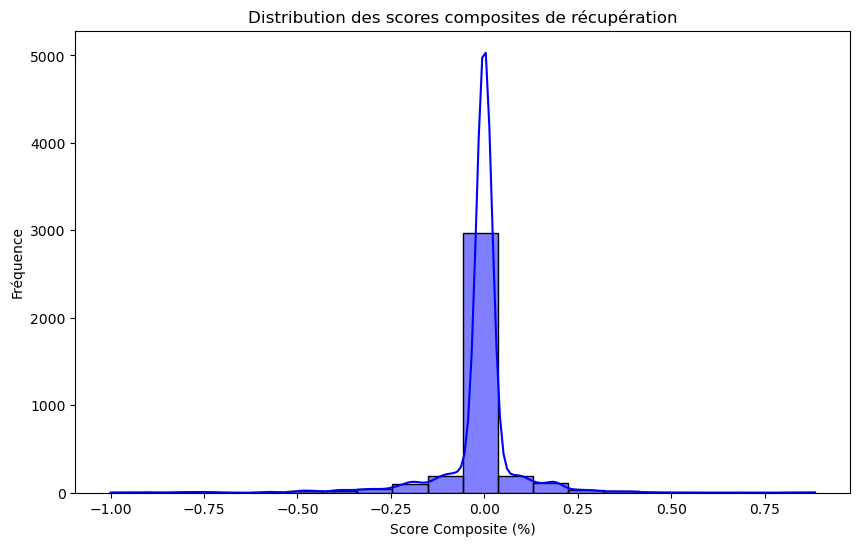

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df_composite["value"], bins=20, kde=True, color="blue")
plt.title("Distribution des scores composites de récupération")
plt.xlabel("Score Composite (%)")
plt.ylabel("Fréquence")
plt.show()


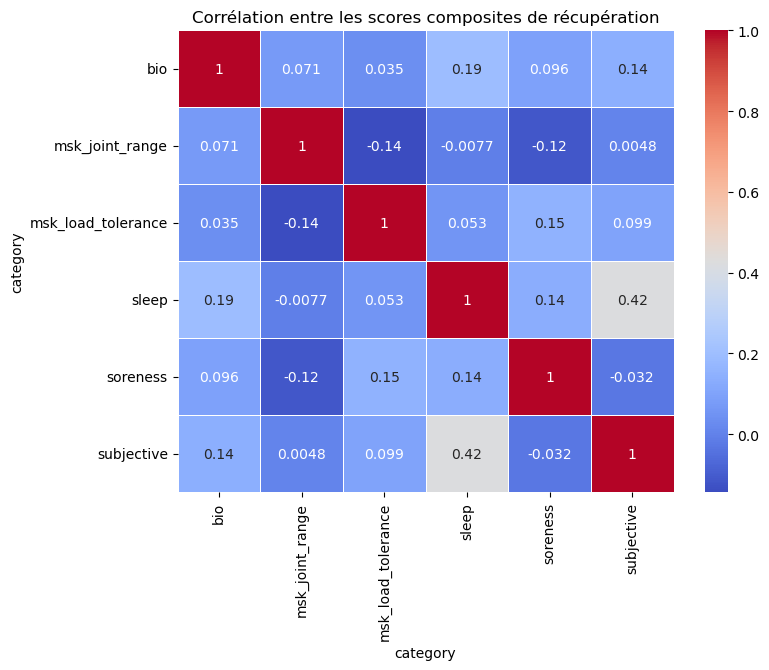

In [20]:
df_pivot = df_composite.pivot(index="sessionDate", columns="category", values="value")

plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Corrélation entre les scores composites de récupération")
plt.show()


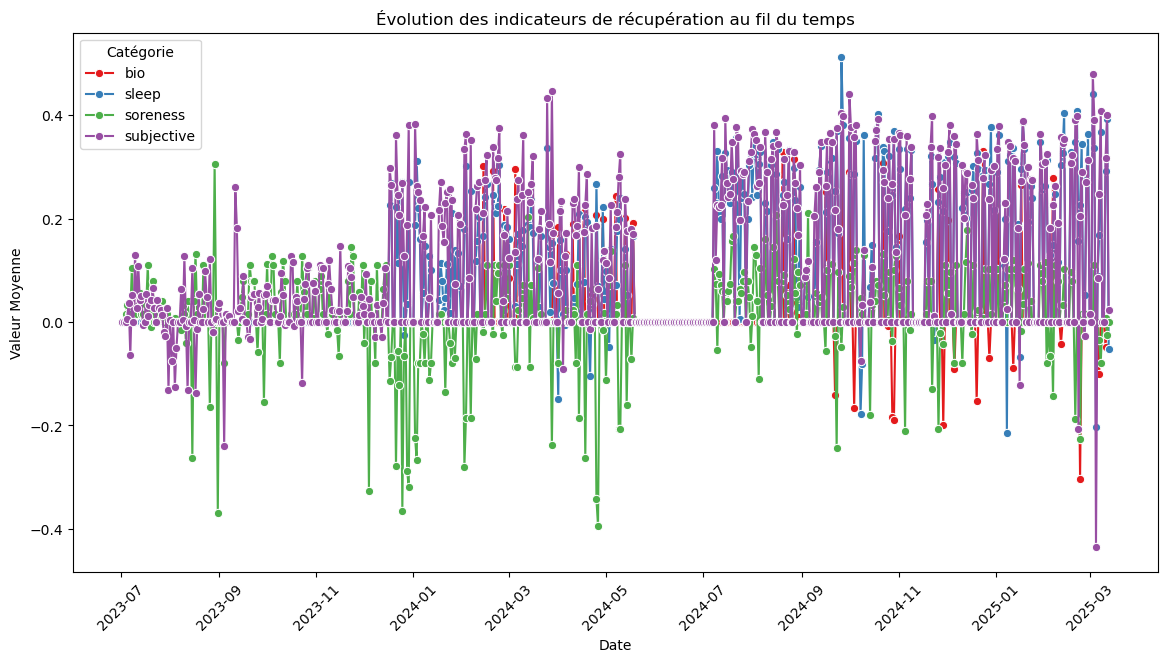

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv("Recovery_status_Data.csv", sep=";")

# Convertir les dates
df["sessionDate"] = pd.to_datetime(df["sessionDate"], format="%d/%m/%Y")

# Filtrer les catégories pertinentes
recovery_categories = ["sleep", "soreness", "subjective", "bio"]
df_recovery = df[df["category"].isin(recovery_categories)]

# Supprimer les valeurs manquantes
df_recovery = df_recovery.dropna(subset=["value"])

# Regrouper par date et catégorie
df_time_series = df_recovery.groupby(["sessionDate", "category"])["value"].mean().reset_index()

# Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_time_series, x="sessionDate", y="value", hue="category", marker="o", palette="Set1")

plt.title("Évolution des indicateurs de récupération au fil du temps")
plt.xlabel("Date")
plt.ylabel("Valeur Moyenne")
plt.xticks(rotation=45)
plt.legend(title="Catégorie")

plt.show()
